In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


<Figure size 864x432 with 0 Axes>

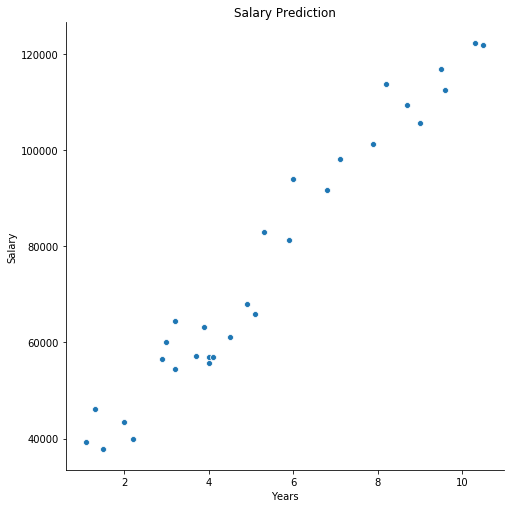

In [9]:
#Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=["YearsExperience"],y_vars=["Salary"],size=7,kind="scatter")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.show()


In [10]:
X = data["YearsExperience"]
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [11]:
y = data["Salary"]
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Split the data for train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [15]:
# Create new axis for x column

X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# Fitting the model

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Predicting the Salary for the Test values

y_pred = lr.predict(X_test)


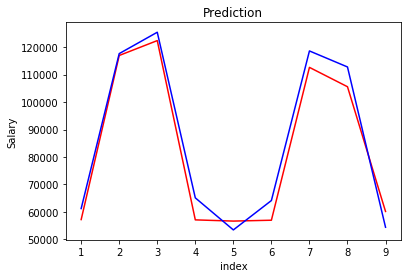

In [21]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('index')
plt.ylabel('Salary')
plt.title('Prediction')
plt.show()

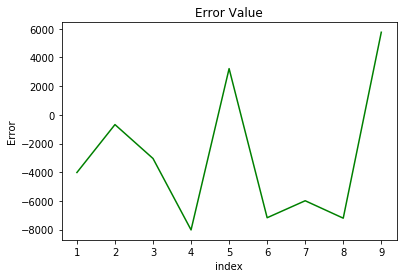

In [22]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [23]:
# Importing metrics for the evaluation of the model

from sklearn.metrics import r2_score,mean_squared_error


In [24]:
# calculate Mean square error

mse = mean_squared_error(y_test,y_pred)

In [25]:
# Calculate R square vale

rsq = r2_score(y_test,y_pred)

In [26]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 30310299.043402452
r square : 0.9627668685473267


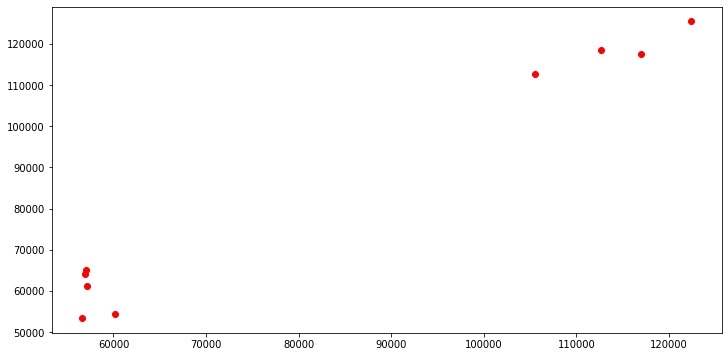

In [27]:
# Just plot actual and predicted values for more insights
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='r',linestyle='-')
plt.show()

In [28]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)


Intercept of the model: 25202.887786154883
Coefficient of the line: [9731.20383825]


In [ ]:
#  y = 25202.8 + 9731.2x